# <center> **Libraries**

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# <center> **Load Dataset**

In [2]:
data_dir  = 'MELON_PICKED'

# Penentuan label
labels = os.listdir(data_dir)
print(labels)
img_size = 400

# Akses data
data = []
for label in labels:
  path = os.path.join(data_dir, label)
  class_num = labels.index(label)
  for img in os.listdir(path):
    try:
      # Ubah ukuran dan tambah ke list
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (img_size, img_size))
      data.append([new_array, class_num])
    except Exception as e:
      pass

X = []
y = []
for features, label in data:
  X.append(features)
  y.append(label)

# Normalisasi
X = np.array(X) / 255.0

# Reshape(row, size, size, img channel)
X = X.reshape(-1, img_size, img_size, 3)
y = np.array(y)

['64 HST', '74 HST', '84 HST']


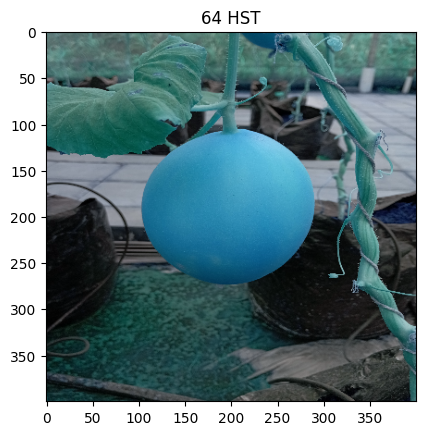

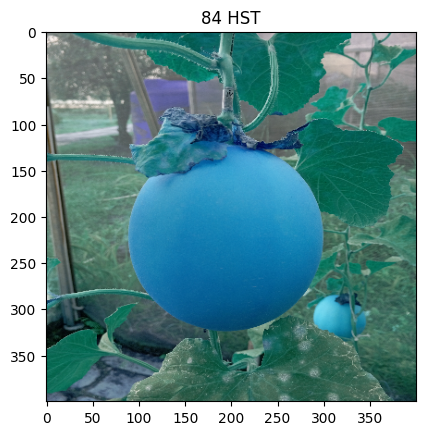

In [3]:
# Print the original image
plt.imshow(X[0], cmap='gray')
plt.title(labels[y[0]])
plt.show()

# Print the resized image
plt.imshow(new_array, cmap='gray')
plt.title(labels[class_num])
plt.show()

# <center> **Split Dataset Train and Test**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **<center>Define CNN Model**

In [5]:
def create_cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(len(labels), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_model

cnn_model = create_cnn_model()

# **<center>Train CNN Model**

In [62]:
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
10/10 [==============================] - 60s 6s/step - loss: 5.6366e-05 - accuracy: 1.0000 - val_loss: 1.5703 - val_accuracy: 0.8421
Epoch 2/50
10/10 [==============================] - 59s 6s/step - loss: 1.9256e-05 - accuracy: 1.0000 - val_loss: 1.5796 - val_accuracy: 0.8421
Epoch 3/50
10/10 [==============================] - 59s 6s/step - loss: 1.7910e-04 - accuracy: 1.0000 - val_loss: 1.5958 - val_accuracy: 0.8553
Epoch 4/50
10/10 [==============================] - 60s 6s/step - loss: 3.9839e-05 - accuracy: 1.0000 - val_loss: 1.6123 - val_accuracy: 0.8553
Epoch 5/50
10/10 [==============================] - 61s 6s/step - loss: 7.1204e-05 - accuracy: 1.0000 - val_loss: 1.6196 - val_accuracy: 0.8553
Epoch 6/50
10/10 [==============================] - 59s 6s/step - loss: 1.6856e-04 - accuracy: 1.0000 - val_loss: 1.6283 - val_accuracy: 0.8553
Epoch 7/50
10/10 [==============================] - 60s 6s/step - loss: 1.6622e-05 - accuracy: 1.0000 - val_loss: 1.6376 - val_accuracy:

# **<center>Flatten Input Image**

In [63]:
X_train_flatten = X_train.reshape(-1, img_size * img_size * 3)
X_test_flatten = X_test.reshape(-1, img_size * img_size * 3)

# **<center>PCA Feature Extraction**

In [64]:
# Import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Choose the desired number of components
X_train_pca = pca.fit_transform(X_train_flatten)
X_test_pca = pca.transform(X_test_flatten)

# **<center>Define ANN Model**

In [65]:
def create_ann_model():
    ann_model = Sequential()
    ann_model.add(Dense(128, input_shape=(50,), activation='relu'))  # Adjust the input shape
    ann_model.add(Dropout(0.5))
    ann_model.add(Dense(64, activation='relu'))
    ann_model.add(Dropout(0.5))
    ann_model.add(Dense(len(labels), activation='softmax'))
    ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return ann_model

ann_model = create_ann_model()

# **<center>Train ANN Model**

In [66]:
ann_model = create_ann_model()
ann_history = ann_model.fit(X_train_pca, y_train, epochs=50, validation_data=(X_test_pca, y_test))

Epoch 1/50
10/10 [==============================] - 1s 22ms/step - loss: 12.6087 - accuracy: 0.3399 - val_loss: 3.3198 - val_accuracy: 0.4079
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 9.7552 - accuracy: 0.3432 - val_loss: 2.7597 - val_accuracy: 0.4737
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 7.7509 - accuracy: 0.4323 - val_loss: 2.4985 - val_accuracy: 0.5526
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 5.6783 - accuracy: 0.4785 - val_loss: 2.1687 - val_accuracy: 0.6053
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 5.0106 - accuracy: 0.5215 - val_loss: 1.9932 - val_accuracy: 0.6447
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 4.8987 - accuracy: 0.5446 - val_loss: 1.8675 - val_accuracy: 0.6711
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 3.9399 - accuracy: 0.5446 - val_loss: 1.7995 - val_accuracy: 0.6711
Epoch 8/50
10/10 [

# **<center>Evaluate CNN Model**




In [67]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Loss: {cnn_loss:.3f}")
print(f"CNN Test Accuracy: {cnn_acc*100:.2f}%")

3/3 [==============================] - 2s 665ms/step - loss: 1.9011 - accuracy: 0.8553
CNN Test Loss: 1.901
CNN Test Accuracy: 85.53%


# **<center>Evaluate ANN Model**

In [68]:
ann_loss, ann_acc = ann_model.evaluate(X_test_pca, y_test)
print(f"ANN Test Loss: {ann_loss:.3f}")
print(f"ANN Test Accuracy: {ann_acc*100:.2f}%")

3/3 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.6711
ANN Test Loss: 0.584
ANN Test Accuracy: 67.11%


# **<center>Classification Report**

In [69]:
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=-1)
ann_predictions = np.argmax(ann_model.predict(X_test_pca), axis=-1)

3/3 [==============================] - 0s 2ms/step


In [70]:
print(y_test)
print(cnn_predictions)

[1 2 0 2 0 1 1 1 0 0 1 1 2 0 0 1 1 2 2 1 2 0 1 1 0 0 0 1 0 0 2 2 2 1 0 2 2
 2 0 1 0 1 2 2 2 1 2 1 0 0 0 0 0 2 2 0 2 1 1 1 2 2 1 2 2 1 2 0 1 2 0 1 1 0
 0 2]
[1 2 0 2 0 0 1 1 0 0 1 1 2 0 0 1 1 2 2 1 1 0 1 1 0 0 1 1 0 0 2 1 2 1 0 2 1
 2 0 1 0 1 2 2 1 1 2 1 0 1 0 1 0 2 2 0 2 1 1 1 2 2 1 2 2 2 2 0 1 2 1 1 1 2
 0 2]


In [71]:
print("CNN Classification Report:")
print(classification_report(y_test, cnn_predictions, target_names=labels))
print("ANN Classification Report:")
print(classification_report(y_test, ann_predictions, target_names=labels, zero_division=1))

CNN Classification Report:
              precision    recall  f1-score   support

      64 HST       0.95      0.80      0.87        25
      74 HST       0.74      0.92      0.82        25
      84 HST       0.92      0.85      0.88        26

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.86      0.86        76

ANN Classification Report:
              precision    recall  f1-score   support

      64 HST       0.59      0.76      0.67        25
      74 HST       0.50      0.40      0.44        25
      84 HST       0.92      0.85      0.88        26

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.66        76
weighted avg       0.67      0.67      0.67        76



# **<center>Confusion Matrix**

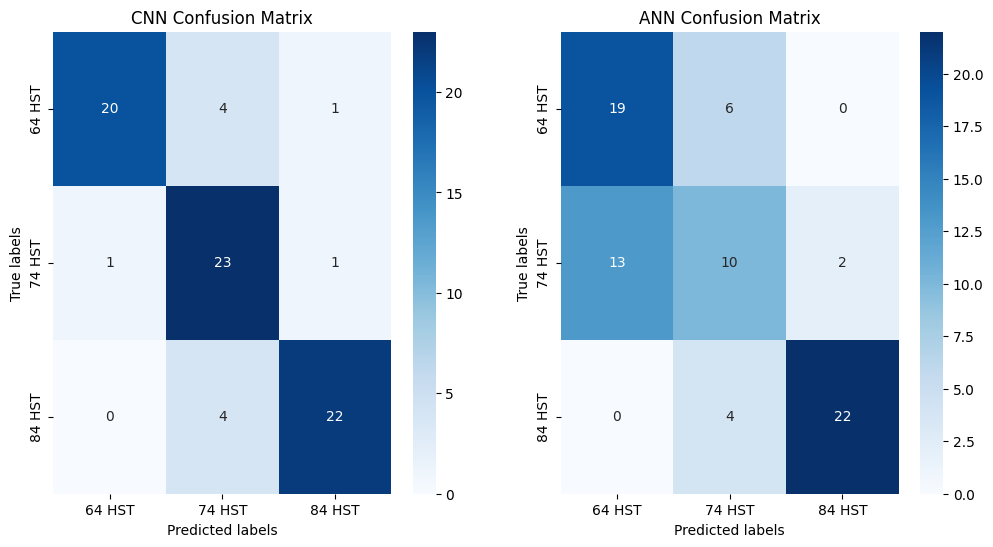

In [72]:
# Define the class names
class_names = labels

# Plot the confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

cnn_cm = confusion_matrix(y_test, cnn_predictions, labels=range(len(class_names)))
sns.heatmap(cnn_cm, annot=True, fmt='g', cmap='Blues', ax=axs[0], xticklabels=class_names, yticklabels=class_names)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('CNN Confusion Matrix')

ann_cm = confusion_matrix(y_test, ann_predictions, labels=range(len(class_names)))
sns.heatmap(ann_cm, annot=True, fmt='g', cmap='Blues', ax=axs[1], xticklabels=class_names, yticklabels=class_names)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('ANN Confusion Matrix')

plt.show()


# **<center>Predictions**

In [73]:
import time

In [74]:
cnn_test_image = X_test[[0]]
start_time = time.time()
cnn_prediction_one = np.argmax(cnn_model.predict(cnn_test_image), axis=-1)
end_time = time.time()
classification_time = end_time - start_time

print(f"Predicted CNN: {len(cnn_prediction_one)}")
print(cnn_prediction_one)
print(f"Time: {classification_time} seconds")

1/1 [==============================] - 0s 62ms/step
Predicted CNN: 1
[1]
Time: 0.10999894142150879 seconds


In [75]:
ann_test_image = X_test_pca[[0]]
start_time = time.time()
ann_prediction_one = np.argmax(ann_model.predict(ann_test_image), axis=-1)
end_time = time.time()
classification_time = end_time - start_time

print(f"Predicted ANN: {len(ann_prediction_one)}")
print(ann_prediction_one)
print(f"Time: {classification_time} seconds")

1/1 [==============================] - 0s 26ms/step
Predicted ANN: 1
[0]
Time: 0.08104538917541504 seconds
